In [3]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pbp_data = nfl.import_pbp_data([2024])
pbp_data.head()

2024 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.257819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.200602,NaN,NaN,NaN,NaN,NaN,0.456761,-45.676102
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690


In [4]:
passing_plays = pbp_data[(pbp_data['pass_attempt']==1) & 
                         (~pbp_data['receiver_player_id'].isna()) & 
                         (pbp_data['two_point_attempt']==0) &
                         (pbp_data['season_type']=='REG')]

passing_plays.head()



,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690
8,199.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,1.680800,0.249492,4.449025,3.0,0.983669,0.983669,0.964793,3.520733
9,224.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.467625,0.408758,2.438555,1.0,1.000000,0.998114,0.392493,60.750706
14,381.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.704705,NaN,NaN,NaN,NaN,NaN,0.955406,4.459399


In [5]:
#Get Next Gen Stats Receiving Data
ngs_data_2024 = nfl.import_ngs_data('receiving',[2024])

ngs_2024_summary = ngs_data_2024[ngs_data_2024['week']==0]

ngs_2024_summary.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
11894,2024,REG,0,Ray-Ray McCloud,WR,ATL,8.143947,3.187889,6.720460,13.054215,...,686.0,1,5.636613,4.465059,1.171554,00-0034407,Ray-Ray,McCloud,34,R.McCloud
11895,2024,REG,0,Marvin Mims,WR,DEN,7.996364,5.205588,7.139808,9.146722,...,501.0,6,12.414103,9.636653,2.777450,00-0038976,Marvin,Mims,19,M.Mims
11896,2024,REG,0,Tutu Atwell,WR,LAR,7.494035,3.368998,11.851452,18.011678,...,562.0,0,2.897143,3.496919,-0.599777,00-0036849,Chatarius,Atwell,5,T.Atwell
11897,2024,REG,0,Greg Dortch,WR,ARI,7.475250,3.688801,4.251600,5.757699,...,342.0,3,8.034324,5.521061,2.513264,00-0035500,Greg,Dortch,4,G.Dortch
11898,2024,REG,0,Troy Franklin,WR,DEN,7.358235,3.805753,13.236604,17.283354,...,263.0,2,6.086786,5.645541,0.441245,00-0039868,Troy,Franklin,16,T.Franklin


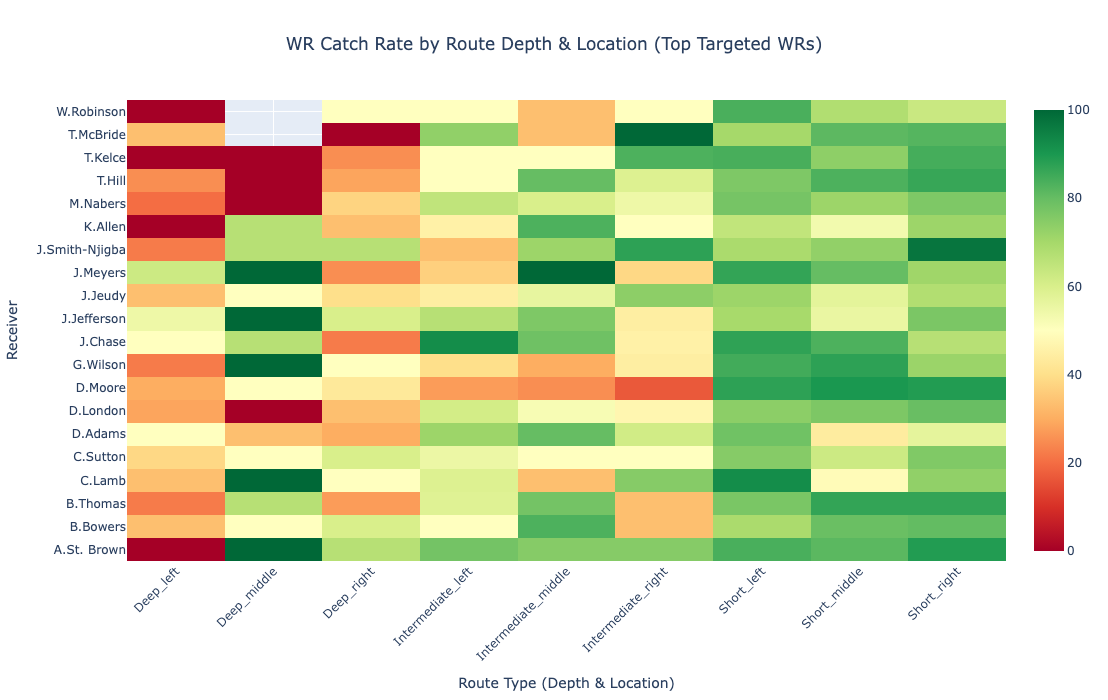

In [25]:
# Approximate route types
def categorize_route(air_yards):
    if air_yards < 10:
        return "Short"
    elif 10 <= air_yards <= 20:
        return "Intermediate"
    else:
        return "Deep"

#Create route_category variable to section the football field
passing_plays = passing_plays.copy()
passing_plays['route_depth'] = passing_plays['air_yards'].apply(categorize_route)
passing_plays['route_category'] = passing_plays['route_depth'] + "_" + passing_plays['pass_location']

# Compute Catch Rate per route category
receiver_df = passing_plays.groupby(["receiver_player_id", "route_category"]).agg(
    targets = ('play_id','count'),
    receptions = ('complete_pass','sum')
).reset_index()

receiver_df['total_targets'] = receiver_df.groupby('receiver_player_id')['targets'].transform('sum')

receiver_df['catch rate'] = (receiver_df['receptions']/receiver_df['targets'])*100

#Filter for just the high volume receivers
high_volume_wrs = receiver_df[(receiver_df['total_targets']>120)]

#Get the receiver names that coincide with the receiver_player_id number
receiver_names = passing_plays[['receiver_player_id','receiver_player_name']].drop_duplicates(subset='receiver_player_id')

merged_df = pd.merge(high_volume_wrs,receiver_names,how='inner',on='receiver_player_id')

cols = merged_df.columns.tolist()
cols.insert(1, cols.pop(cols.index('receiver_player_name')))
merged_df = merged_df[cols]


# Pivot for heatmap
catch_rate_heatmap = merged_df.pivot(
    index="receiver_player_name", columns="route_category", values="catch rate"
)

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=catch_rate_heatmap,  # Heatmap values
    x=catch_rate_heatmap.columns,  # X-axis (Route Categories)
    y=catch_rate_heatmap.index,  # Y-axis (Receivers)
    colorscale="RdYlGn",  # Red (low) → Yellow (mid) → Green (high)
    text=catch_rate_heatmap.round(1).astype(str) + "%",  # Display percentages
    hoverinfo="text"  # Show values on hover
))

# Layout settings
fig.update_layout(
    title=dict(text="WR Catch Rate by Route Depth & Location (Top Targeted WRs)",x=0.5),
    xaxis_title="Route Type (Depth & Location)",
    yaxis_title="Receiver",
    xaxis=dict(tickangle=-45),  # Rotate X labels for better readability
    yaxis=dict(tickfont=dict(size=12)),
    height=700,
    width=800,
    autosize=True
)
# Show the heatmap
fig.show()


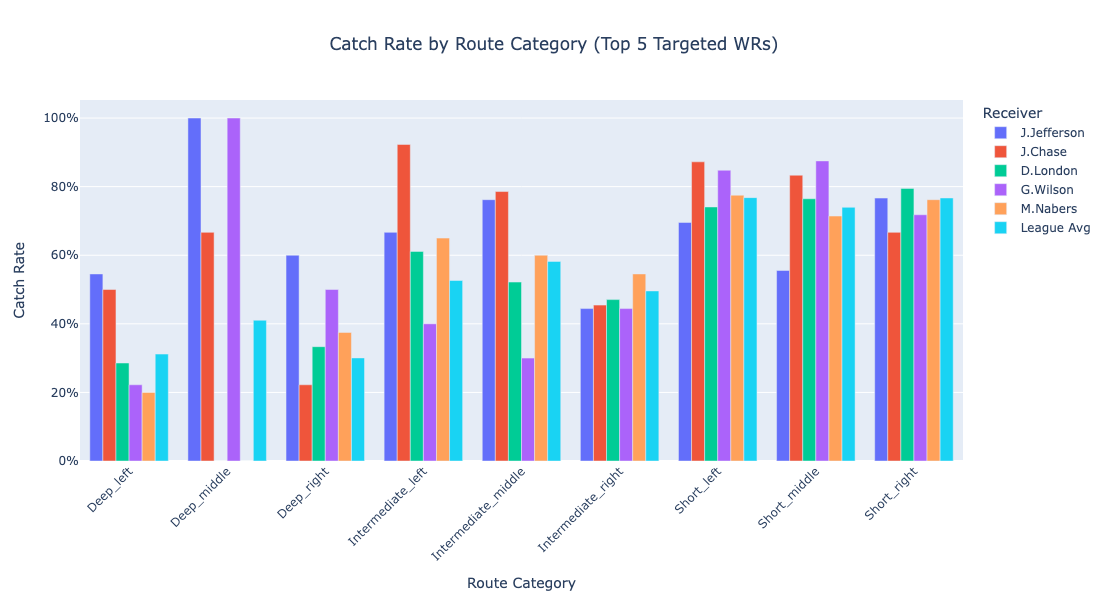

In [7]:
# Filter to WRs with enough targets and top 5 by total volume
top_wr_names = (
    receiver_df.groupby(['receiver_player_id'])['targets']
    .sum()
    .nlargest(5)
    .index
)

bar_df = receiver_df[receiver_df["receiver_player_id"].isin(top_wr_names)]

bar_df = pd.merge(bar_df,receiver_names,how='inner',on='receiver_player_id')

#Get the league average in catch rate for each category
league_avg = receiver_df.groupby("route_category")["catch rate"].mean().reset_index()

league_avg["receiver_player_name"] = "League Avg"

#Combine the players and league average into one data frame
comparison_df = pd.concat([bar_df, league_avg])

comparison_df['catch rate'] = comparison_df['catch rate']/100

# Create the bar plot
fig = px.bar(
    comparison_df,
    x="route_category",
    y="catch rate",
    color="receiver_player_name",
    barmode="group",
    labels={
        "receiver_player_name": "Receiver",
        "catch_rate": "Catch Rate",
        "route_category": "Route Category"
    },
    title="Catch Rate by Route Category (Top 5 Targeted WRs)"
)

# Tweak layout
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    legend_title="Receiver",
    bargap=0.2,
    height=600,
    title_x=0.5,
    yaxis_title = "Catch Rate"
)
fig.update_yaxes(tickformat=".0%")
fig.show()


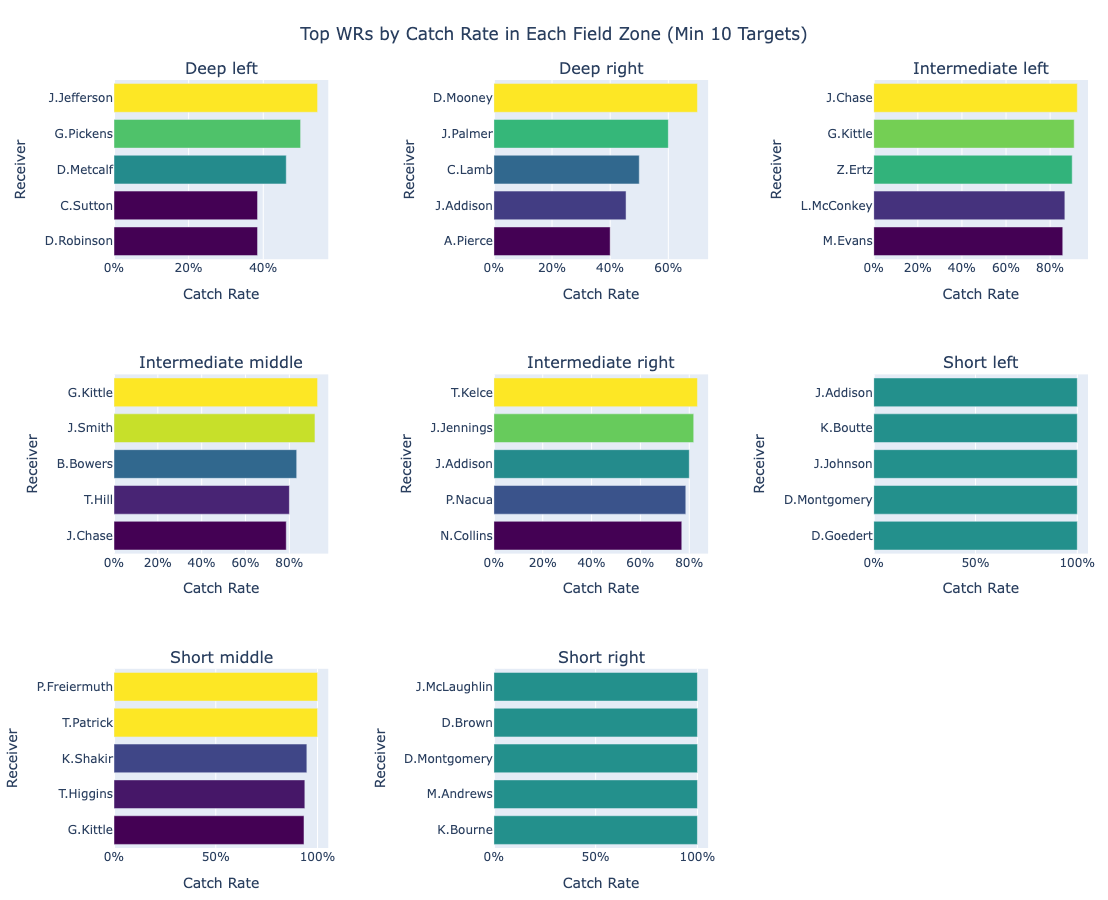

In [8]:
#Filter for players that had a minimum of 10 targets in each zone of the field

min_targets = 10

zone_filter = receiver_df[receiver_df['targets']>=min_targets]

top_per_zone = (
    zone_filter.sort_values(["route_category", "catch rate"], ascending=[True, False])
    .groupby("route_category")
    .head(5)  # Top 5 per zone
)

top_per_zone = pd.merge(top_per_zone,receiver_names,how='inner',on='receiver_player_id')

# Define unique route categories and layout

route_categories = sorted(top_per_zone["route_category"].unique())
n_rows, n_cols = 3, 3
fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=[route.replace("_", " ") for route in route_categories],
                    horizontal_spacing=0.17, vertical_spacing=0.15)

# Add bars to each subplot
for i, route in enumerate(route_categories):
    row = i // n_cols + 1
    col = i % n_cols + 1
    zone_df = top_per_zone[top_per_zone["route_category"] == route].sort_values("catch rate", ascending=True)

    fig.add_trace(
        go.Bar(
            x=zone_df["catch rate"]/100,
            y=zone_df["receiver_player_name"],
            orientation="h",
            marker=dict(color=zone_df["catch rate"], colorscale="Viridis"),
            hoverinfo="x+y"
        ),
        row=row, col=col
    )

# Update layout globally
fig.update_layout(
    height=900,
    width=1000,
    showlegend=False,
    title_text="Top WRs by Catch Rate in Each Field Zone (Min 10 Targets)",
    title_x=0.5,
    font=dict(size=12),
    margin=dict(t=80, l=50, r=20, b=50)
)

# Axis label adjustments
for i in range(1, len(route_categories) + 1):
    fig.update_yaxes(title_text="Receiver", row=(i - 1) // n_cols + 1, col=(i - 1) % n_cols + 1)
    fig.update_xaxes(title_text="Catch Rate",tickformat=".0%", row=(i - 1) // n_cols + 1, col=(i - 1) % n_cols + 1)

fig.show()

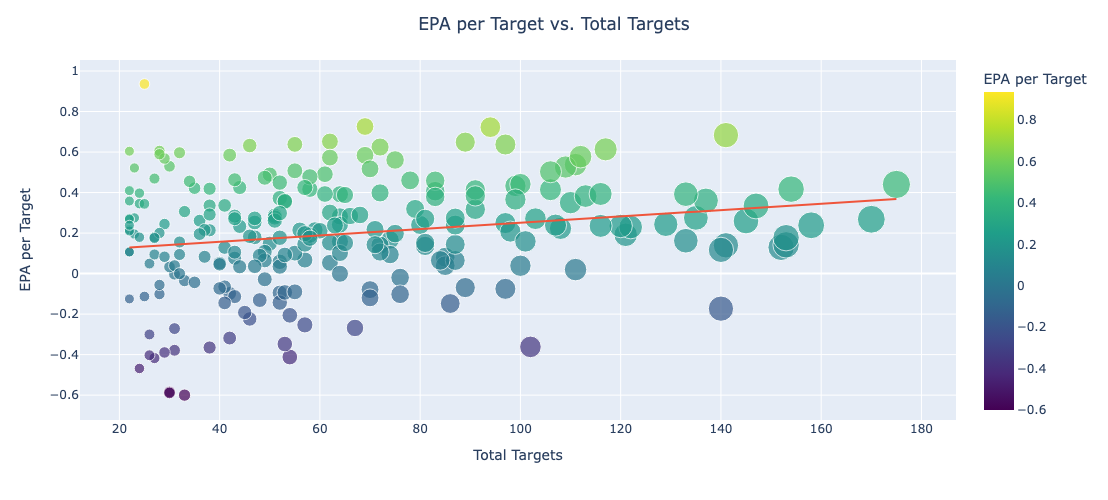

In [9]:
# Compute EPA per target
epa_per_target_df = passing_plays.groupby(["receiver_player_id"]).agg(
    total_targets = ('play_id','count'),
    total_epa=('epa', 'sum')
).reset_index()


epa_per_target_df['epa_per_target'] = epa_per_target_df['total_epa'] / epa_per_target_df['total_targets']

epa_per_target_df = pd.merge(epa_per_target_df,receiver_names,how='left',on='receiver_player_id')

#Filter for receivers with at least 20 targets through the season
scatter_data = epa_per_target_df[epa_per_target_df['total_targets']>20]

# Create interactive scatterplot
fig = px.scatter(scatter_data, x='total_targets', y='epa_per_target',
                 hover_name='receiver_player_name',
                 size='total_targets', 
                 color='epa_per_target',
                 color_continuous_scale='Viridis',
                 trendline='ols'
                )

fig.update_layout(
    title=dict(text="EPA per Target vs. Total Targets",x=0.5),
    xaxis_title="Total Targets", 
    yaxis_title="EPA per Target",
    width = 1000,
    height = 500,
    coloraxis_colorbar=dict(
        title="EPA per Target"
    )
)


fig.show()

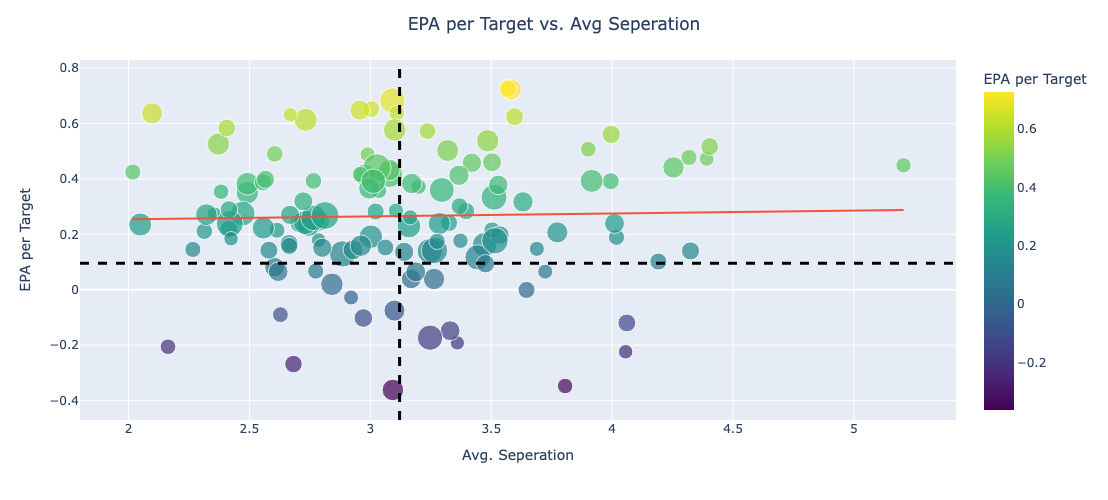

In [12]:
#Create Scatter Plot of EPA Per Target vs Avg Seperation
epa_scatter_data = pd.merge(epa_per_target_df,ngs_2024_summary,how='inner',left_on='receiver_player_id',
                      right_on = 'player_gsis_id')

league_avg_separation = ngs_2024_summary['avg_separation'].mean()

league_avg_epa = epa_per_target_df['epa_per_target'].mean()

# Create interactive scatterplot
fig = px.scatter(epa_scatter_data, x='avg_separation', y='epa_per_target',
                 hover_name='player_display_name',
                 size='total_targets', 
                 color='epa_per_target',
                 color_continuous_scale='Viridis',
                 trendline='ols'
                 )

fig.add_hline(y=league_avg_epa,line_dash='dash',line_color='black',line_width=3)
fig.add_vline(x=league_avg_separation,line_dash='dash',line_color='black',line_width=3)

fig.update_layout(
    title=dict(text="EPA per Target vs. Avg Seperation",x=0.5),
    xaxis_title="Avg. Seperation", 
    yaxis_title="EPA per Target",
    width = 1000,
    height = 500,
    coloraxis_colorbar=dict(
        title="EPA per Target"
    )
    
)
fig.show()


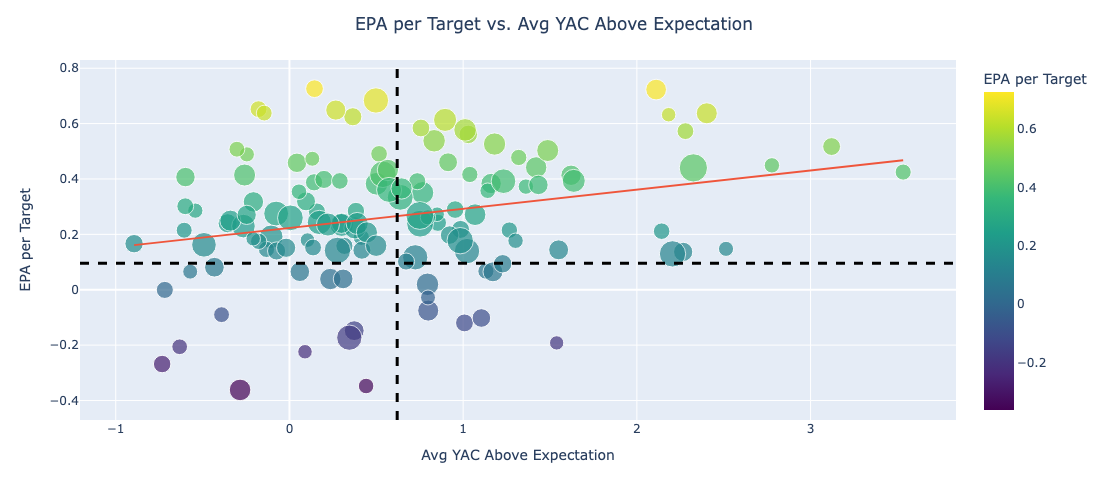

In [13]:
#Create Scatter Plot of EPA Per Target vs YAC Above Expected

league_avg_above_xyac = ngs_2024_summary['avg_yac_above_expectation'].mean()

fig = px.scatter(epa_scatter_data, x='avg_yac_above_expectation', y='epa_per_target',
                 hover_name='player_display_name',
                 size='total_targets', 
                 color='epa_per_target',
                 color_continuous_scale='Viridis',
                 trendline="ols"
                 )

fig.update_layout(
    title=dict(text="EPA per Target vs. Avg YAC Above Expectation",x=0.5),
    xaxis_title="Avg YAC Above Expectation", 
    yaxis_title="EPA per Target",
    width = 1000,
    height = 500,
    coloraxis_colorbar=dict(
        title="EPA per Target"
    )
)

fig.add_hline(y=league_avg_epa,line_dash='dash',line_color='black',line_width=3)
fig.add_vline(x=league_avg_above_xyac,line_dash='dash',line_color='black',line_width=3)


fig.show()

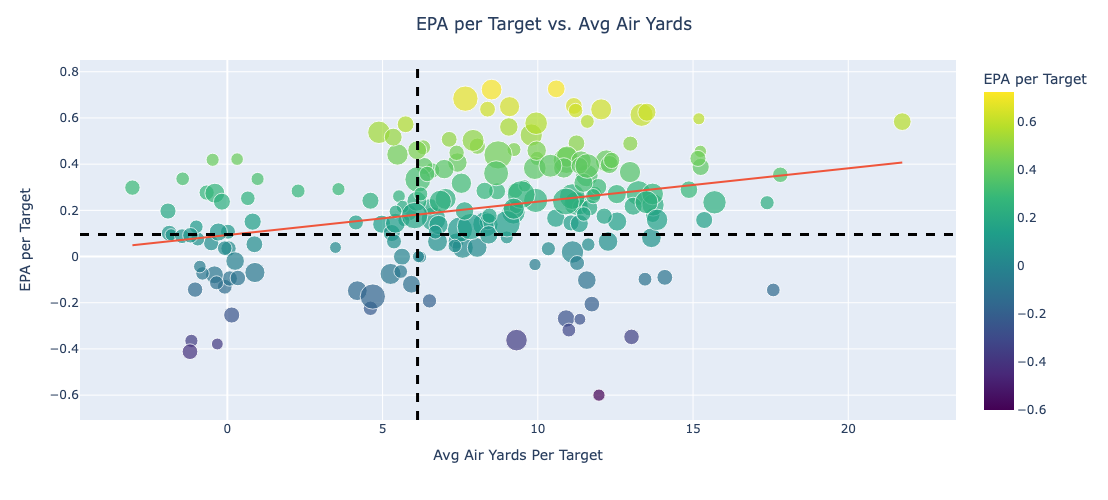

In [14]:
#Create dataframe to find average depth to target
air_yards_df = passing_plays.groupby(['receiver_player_id']).agg(
    avg_air_yards = ('air_yards','mean')
)

#Merge dataframe with EPA per Target dataframe
air_yards_vs_epa_df = pd.merge(air_yards_df,epa_per_target_df,how='inner',on='receiver_player_id')

#Calculate average depth of target for entire NFL
league_avg_air_yards = air_yards_df['avg_air_yards'].mean()

#Filter for receivers with at least 30 targets through the whole season
scatter_data = air_yards_vs_epa_df[air_yards_vs_epa_df['total_targets']>30]

fig = px.scatter(scatter_data, x='avg_air_yards', y='epa_per_target',
                 hover_name='receiver_player_name',
                 size='total_targets', 
                 color='epa_per_target',
                 color_continuous_scale='Viridis',
                 trendline="ols"
                 )

fig.update_layout(
    title=dict(text="EPA per Target vs. Avg Air Yards",x=0.5),
    xaxis_title="Avg Air Yards Per Target", 
    yaxis_title="EPA per Target",
    width = 1000,
    height = 500,
    coloraxis_colorbar=dict(
        title="EPA per Target"
    )
    
)

fig.add_hline(y=league_avg_epa,line_dash='dash',line_color='black',line_width=3)
fig.add_vline(x=league_avg_air_yards,line_dash='dash',line_color='black',line_width=3)


fig.show()

In [26]:
#Create a receiver dataframe that includes the air yards along with next gen stats data
wr_data = pd.merge(epa_scatter_data,air_yards_df,how='inner',on='receiver_player_id')

wr_data.head()

,receiver_player_id,total_targets,total_epa,epa_per_target,receiver_player_name,season,season_type,week,player_display_name,player_position,...,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name,avg_air_yards
0,00-0030035,62,40.429081,0.652082,A.Thielen,2024,REG,0,Adam Thielen,WR,...,5,3.508333,3.686438,-0.178105,00-0030035,Adam,Thielen,19,A.Thielen,11.161290
1,00-0030061,91,28.876541,0.317325,Z.Ertz,2024,REG,0,Zach Ertz,TE,...,7,3.143333,3.350768,-0.207435,00-0030061,Zachary,Ertz,86,Z.Ertz,7.538462
2,00-0030279,121,23.164839,0.191445,K.Allen,2024,REG,0,Keenan Allen,WR,...,7,3.763857,3.868566,-0.104709,00-0030279,Keenan,Allen,13,K.Allen,9.214876
3,00-0030506,133,21.573751,0.162209,T.Kelce,2024,REG,0,Travis Kelce,TE,...,3,3.769691,4.261860,-0.492169,00-0030506,Travis,Kelce,87,T.Kelce,6.639098
4,00-0030564,80,19.209225,0.240115,D.Hopkins,2024,REG,0,DeAndre Hopkins,WR,...,5,2.636786,2.992582,-0.355796,00-0030564,DeAndre,Hopkins,8,D.Hopkins,11.200000


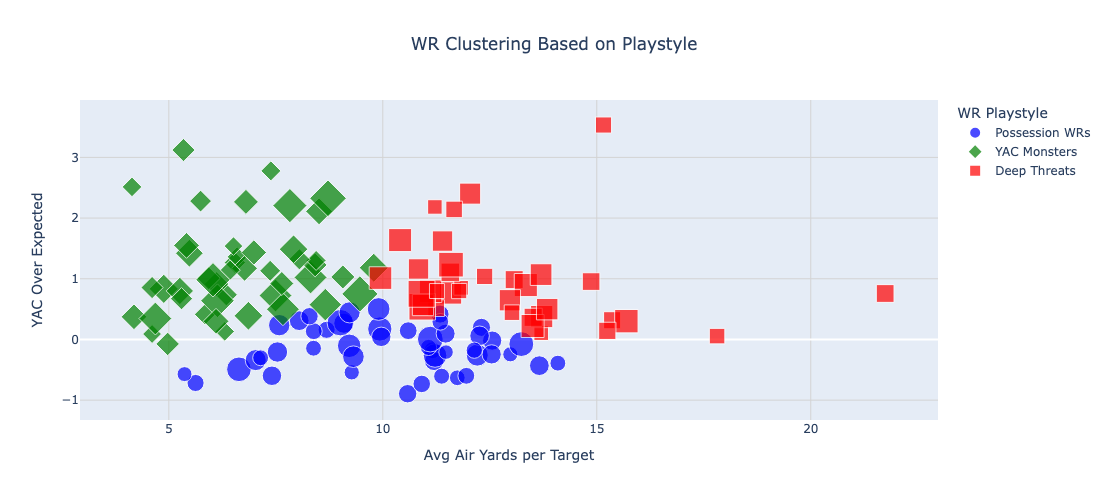

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Features for cluster analysis
features = ["avg_air_yards", "avg_yac_above_expectation"]

wr_features = wr_data[features]

# Standardize data
scaler = StandardScaler()
wr_scaled = scaler.fit_transform(wr_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wr_data["WR_cluster"] = kmeans.fit_predict(wr_scaled)

# Map cluster numbers to labels (Optional: Rename based on WR playstyles)
cluster_names = {
    0: "YAC Monsters",
    1: "Deep Threats",
    2: "Possession WRs"
    }

wr_data['WR_cluster_label'] = wr_data['WR_cluster'].map(cluster_names)

# Visualize Clusters
fig = px.scatter(wr_data, 
                 x="avg_air_yards", 
                 y="avg_yac_above_expectation",
                 hover_name="player_display_name",
                 color="WR_cluster_label",
                 symbol="WR_cluster_label",
                 size="total_targets",
                 color_discrete_map={
                     "Deep Threats": "red",
                     "Possession WRs": "blue",
                     "YAC Monsters": "green"
                 },
                 title="WR Clustering Based on Playstyle")



fig.update_layout(
    xaxis_title="Avg Air Yards per Target",
    yaxis_title="YAC Over Expected",
    legend_title="WR Playstyle",
    xaxis=dict(gridcolor="lightgray"),
    yaxis=dict(gridcolor="lightgray"),
    title=dict(x=0.5),
    width = 1000,
    height = 500
    )

fig.show()


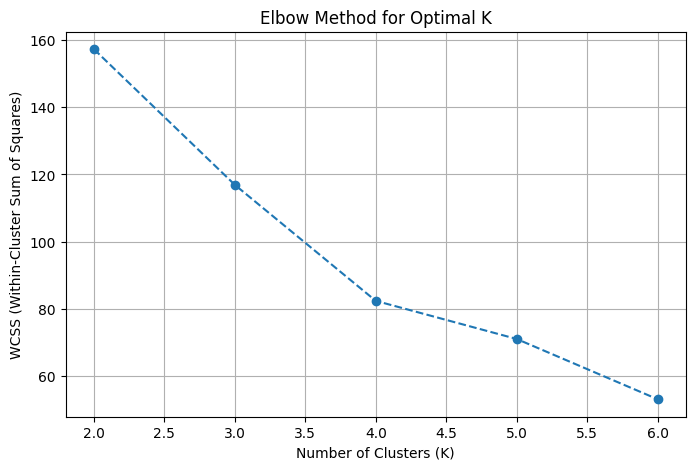

In [28]:
# Try different K values
wcss = []  # Within-cluster sum of squares

for k in range(2, 7):  # Testing K from 2 to 6
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wr_scaled)
    wcss.append(kmeans.inertia_)  # Append sum of squared distances

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

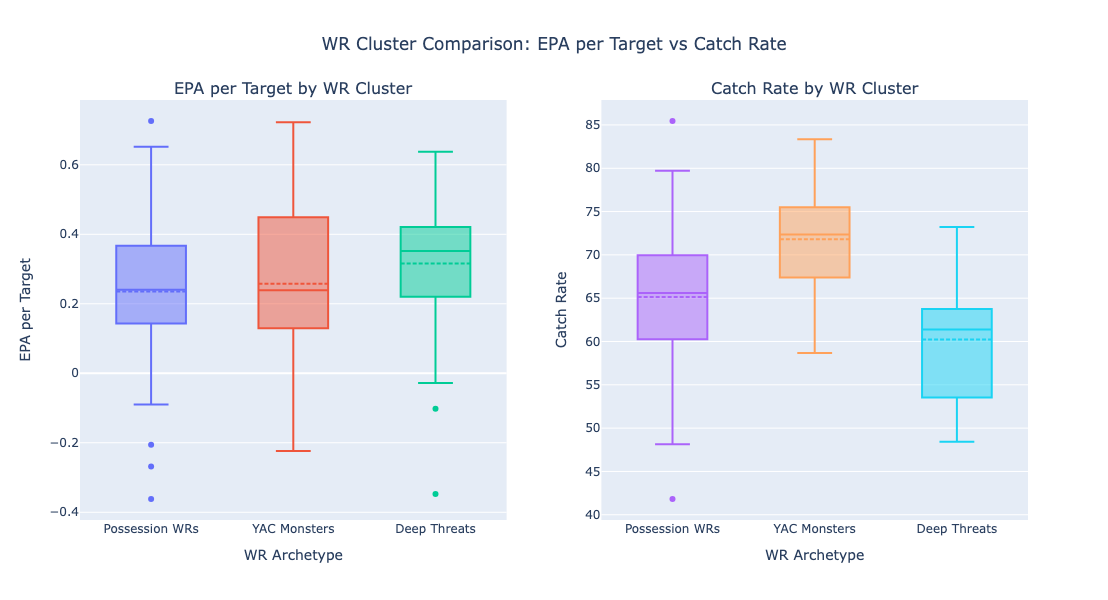

In [29]:
# Create subplot layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("EPA per Target by WR Cluster", "Catch Rate by WR Cluster"),
    shared_yaxes=False
)

# Boxplot for EPA per Target
for cluster in wr_data["WR_cluster_label"].unique():
    cluster_data = wr_data[wr_data["WR_cluster_label"] == cluster]
    fig.add_trace(
        go.Box(
            y=cluster_data["epa_per_target"],
            name=cluster,
            boxmean=True,
            marker_color=None,
            showlegend=False
        ),
        row=1, col=1
    )

# Boxplot for Catch Rate
for cluster in wr_data["WR_cluster_label"].unique():
    cluster_data = wr_data[wr_data["WR_cluster_label"] == cluster]
    fig.add_trace(
        go.Box(
            y=cluster_data["catch_percentage"],
            name=cluster,
            boxmean=True,
            marker_color=None,
            showlegend=False
        ),
        row=1, col=2
    )

# Layout polish
fig.update_layout(
    title_text="WR Cluster Comparison: EPA per Target vs Catch Rate",
    title_x=0.5,
    height=600,
    width=1000
)

fig.update_yaxes(title_text="EPA per Target", row=1, col=1)
fig.update_yaxes(title_text="Catch Rate", row=1, col=2)
fig.update_xaxes(title_text="WR Archetype", row=1, col=1)
fig.update_xaxes(title_text="WR Archetype", row=1, col=2)

fig.show()